In [2]:
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

sys.path.append(os.path.join(os.getenv("HOME"), "gpuaffman_networks/"))
import limit_cycles, binary_core


In [7]:
plt_save_dir = "/home/trevor/boolean_network_data/plots_and_misc_material"

In [3]:
def run_limit_cycle_experiment(batch_size, N, k, P, max_iters):
    init_states = cp.array(binary_core.random_binary_data((batch_size, N), 0.5))
    functions = cp.array(binary_core.random_binary_data((batch_size, N, 1<<k), P))
    connectivity = cp.array(np.random.randint(0, N, (batch_size, N, k)))
    results = limit_cycles.measure_limit_cycle_lengths(init_states, functions, connectivity, max_n_iter=max_iters, verbose=True)
    print("Done N: {}, k: {}".format(N, k))
    return results

In [4]:
P = 0.5
batch_size = 1000

In [5]:
k_vals = [1, 2, 3]
N_vals = [5, 10, 15, 30, 50, 75, 100]



dif_k_results = []
for k in k_vals:
    diff_N_results = []
    for N in N_vals:
        diff_N_results.append(run_limit_cycle_experiment(batch_size, N, k, P, 500 * N))
    dif_k_results.append(diff_N_results)


0: 972, (1000, 5), 0
1: 684, (1000, 5), 0
2: 279, (1000, 5), 0
3: 87, (1000, 5), 0
4: 25, (1000, 5), 0
5: 8, (1000, 5), 0
6: 3, (1000, 5), 0
7: 2, (1000, 5), 0
8: 0, (1000, 5), 0
Done N: 5, k: 1
0: 1000, (1000, 10), 0
1: 918, (1000, 10), 0
2: 609, (1000, 10), 0
3: 306, (1000, 10), 0
4: 121, (1000, 10), 0
5: 48, (1000, 10), 0
6: 19, (1000, 10), 0
7: 9, (1000, 10), 0
8: 5, (1000, 10), 0
9: 3, (1000, 10), 0
10: 3, (1000, 10), 1
11: 3, (1000, 10), 2
12: 1, (1000, 10), 0
13: 1, (1000, 10), 1
14: 1, (1000, 10), 2
15: 1, (1000, 10), 3
16: 1, (1000, 10), 4
17: 1, (1000, 10), 5
18: 1, (1000, 10), 6
19: 0, (1000, 10), 0
Done N: 10, k: 1
0: 1000, (1000, 15), 0
1: 971, (1000, 15), 0
2: 741, (1000, 15), 0
3: 444, (1000, 15), 0
4: 220, (1000, 15), 0
5: 102, (1000, 15), 0
6: 51, (1000, 15), 0
7: 24, (1000, 15), 0
8: 10, (1000, 15), 0
9: 3, (1000, 15), 0
10: 1, (1000, 15), 0
11: 1, (1000, 15), 1
12: 0, (1000, 15), 0
Done N: 15, k: 1
0: 1000, (1000, 30), 0
1: 999, (1000, 30), 0
2: 942, (1000, 30), 0
3:

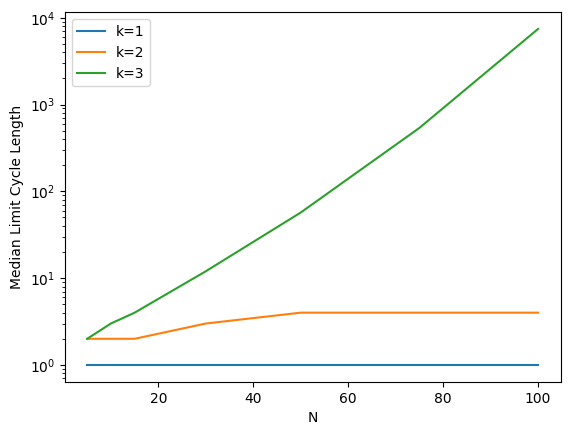

In [10]:
fig, axs = plt.subplots()
for i, k in enumerate(k_vals):
    this_k_results= dif_k_results[i]
    medians = []
    for N, this_n_results in zip(N_vals, this_k_results):
        infd_n_results = np.where(this_n_results[0] == 0, np.inf, this_n_results[0])
        median_length = np.median(infd_n_results)
        medians.append(median_length)
    axs.plot(N_vals, medians, label="k={}".format(k))
    axs.set_yscale("log")
    axs.legend()
    axs.set_xlabel("N")
    axs.set_ylabel("Median Limit Cycle Length")
    plt.savefig(os.path.join(plt_save_dir, "criticality.png"), dpi=400)
    print("")


In [4]:
import importlib
importlib.reload(general_network)
N_vals =  1 * np.floor(np.logspace(start=0, stop=4, num=10)).astype(np.int)
k_2_scaling_results = []
mempool = cp.get_default_memory_pool()
for N in N_vals:
        print(mempool.used_bytes())
        k_2_scaling_results.append(run_limit_cycle_experiment(batch_size, N, 2, P, 10 * N))


/tmp/ipykernel_71583/1560401779.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  N_vals =  1 * np.floor(np.logspace(start=0, stop=4, num=10)).astype(np.int)


512
0: 494, (1000, 1), 2.4064e-05, 0
1: 0, (1000, 1), 2.2528e-05, 0
Done N: 1, k: 2
512
0: 751, (1000, 2), 4.8128e-05, 0
1: 310, (1000, 2), 4.6592e-05, 0
2: 51, (1000, 2), 4.4544e-05, 0
3: 0, (1000, 2), 4.352e-05, 0
Done N: 2, k: 2
512
0: 988, (1000, 7), 0.000169472, 0
1: 909, (1000, 7), 0.000174592, 0
2: 730, (1000, 7), 0.000175104, 0
3: 504, (1000, 7), 0.000171008, 0
4: 316, (1000, 7), 0.000164864, 0
5: 201, (1000, 7), 0.000160768, 0
6: 124, (1000, 7), 0.000156672, 0
7: 74, (1000, 7), 0.000154112, 0
8: 50, (1000, 7), 0.000152576, 0
9: 34, (1000, 7), 0.000151552, 0
10: 27, (1000, 7), 0.00015104, 0
11: 20, (1000, 7), 0.000150528, 0
12: 13, (1000, 7), 0.000150016, 0
13: 11, (1000, 7), 0.000150016, 0
14: 7, (1000, 7), 0.000149504, 0
15: 6, (1000, 7), 0.000149504, 0
16: 5, (1000, 7), 0.000149504, 0
17: 5, (1000, 7), 0.000149504, 1
18: 4, (1000, 7), 0.000149504, 0
19: 4, (1000, 7), 0.000149504, 1
20: 4, (1000, 7), 0.000149504, 2
21: 1, (1000, 7), 0.000148992, 0
22: 1, (1000, 7), 0.00014899

KeyboardInterrupt: 

In [ ]:
np.save("results_big_n.npy", k_2_scaling_results, allow_pickle=True)

In [18]:
medians = []
for n, result in zip(N_vals[1:], k_2_scaling_results[1:]):
    infd_results = result[0][np.nonzero(result[0])]
    medians.append(np.median(infd_results))

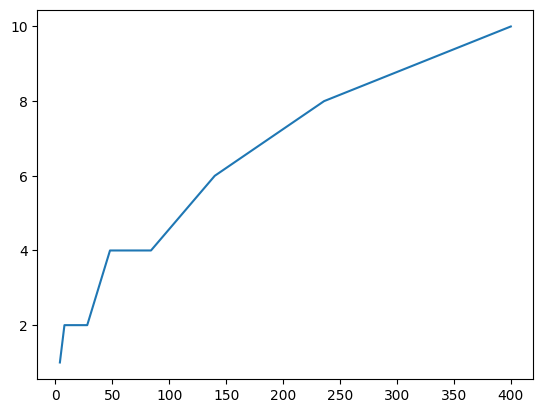

In [19]:
fig, axs = plt.subplots()
axs.plot(N_vals[1:], medians)


In [22]:
last_result = k_2_scaling_results[-1]
last_result_lengths = last_result[0]
nonzero_idx = np.nonzero(last_result_lengths)
last_result_cycle_starts = last_result[1][:, 0]


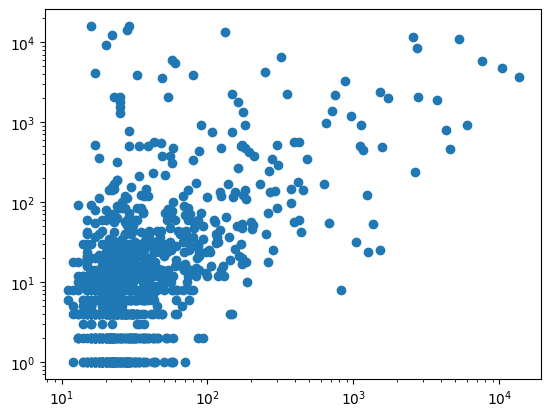

In [36]:
fig, axs = plt.subplots()
axs.scatter(last_result_cycle_starts[nonzero_idx], last_result_lengths[nonzero_idx])
axs.set_xscale("log")
axs.set_yscale("log")

In [24]:
def make_cdf(data):
    data_nonzero = data[np.nonzero(data)]
    x = np.sort(data_nonzero)
    f = np.arange(start=0, stop=np.size(data_nonzero), step=1)/float(np.size(data))
    return x, f


Text(0, 0.5, 'CDF')

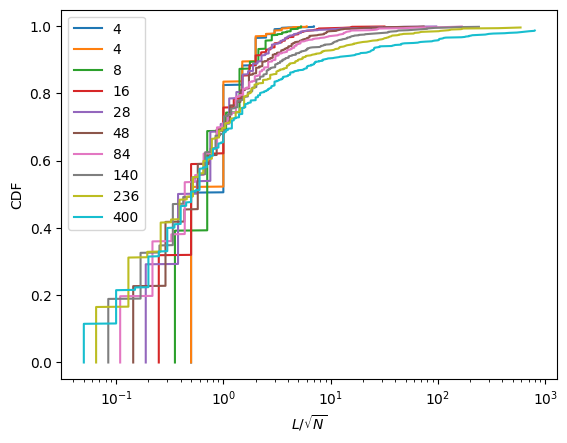

In [35]:
fig, axs = plt.subplots()
for i, (N, data) in enumerate(zip(N_vals, k_2_scaling_results)):
    cdf_x, cdf_y = make_cdf(data[0])
    axs.plot(cdf_x/np.sqrt(N), cdf_y, label="{}".format(N))
axs.set_xscale("log")
axs.legend()
axs.set_xlabel(r"$L/\sqrt{N}$")
axs.set_ylabel("CDF")

Text(0, 0.5, 'CDF')

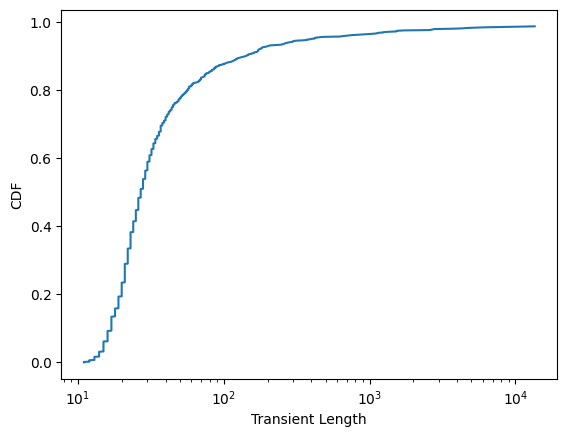

In [40]:
fig, axs = plt.subplots()
cdf_x, cdf_y = make_cdf(k_2_scaling_results[-1][1][:, 0])
axs.plot(cdf_x, cdf_y)
axs.set_xscale("log")
axs.set_xlabel("Transient Length")
axs.set_ylabel("CDF")
